# Assignment 4
## Due May 15th

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

Here you would normaly get a "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility" warning. You do not since we silenced the warning in the first cell. If you are interested read here
https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

In [6]:
def get_data_x_cube(n):
        
    x = np.random.uniform(0, 4, n)
    X = np.expand_dims(x, axis=-1)
    y = 3*(x-2)**3 + 0.1*np.random.normal(0, 1, n)
    Y = np.expand_dims(y, axis=-1)
    
    return X, Y

In [7]:
def get_data(n):
        
    x = np.random.uniform(0, 4, n)
    X = np.expand_dims(x, axis=-1)
    y = x + np.random.normal(0, 3, n)
    Y = np.expand_dims(y, axis=-1)
    
    return X, Y

# Exercise 1

### a)

In [44]:
def MSE(Y_pred, Y):
    mse = np.mean(np.square(Y_pred - Y))
    return mse

### b)

X.shape[0]--> number of rows

In [52]:
def k_fold_evaluation_MSE(classifier, X, Y, K=10):
    fold_x = int(X.shape[0] / K) #number of rows divided by K
    fold_y = int(Y.shape[0]/ K)
    mse_sum = 0
    #increment k in steps of fold
    for k in range(K):
        #increment in steps of fold from 0 till X.shape
        x_val = X[k*fold_x:(k+1)*fold_x]
        #part before the folded part
        x_rest1 = X[:k*fold_x]
        #part after the folded part
        x_rest2 = X[(k+1)*fold_x:]
        #trainset combined
        x_train = np.vstack((x_rest1,x_rest2))
        
        y_val = Y[k*fold_y:(k+1)*fold_y]
        #part before the folded part
        y_rest1 = Y[:k*fold_y]
        #part after the folded part
        y_rest2 = Y[(k+1)*fold_y:]
        #trainset combined
        y_train = np.vstack((y_rest1,y_rest2))
       
        classifier.fit(x_train, y_train)
        Y_pred = classifier.predict(x_val)
        mse_sum = mse_sum + MSE(Y_pred, y_val)
    return mse_sum/K

In [53]:
X, Y = get_data_x_cube(300)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]
c = Ridge(0.5)
# cross validation on trainingsset!!!!!
test = k_fold_evaluation_MSE(c, X_train, Y_train, K=10)

In [54]:
test

15.510062650564285

### c)

In [80]:
def k_fold_cv_ridge(X, Y, lambdas, K=10):
    test = []
    for lam in lambdas:
        c = Ridge(lam)
        test.append(k_fold_evaluation_MSE(c, X_train, Y_train, K=10))
    #log transformation
    plt.semilogx(lambdas, test)
    plt.xlabel("Lambda")
    plt.ylabel("Log-Tranformation")
    plt.show()
    return test

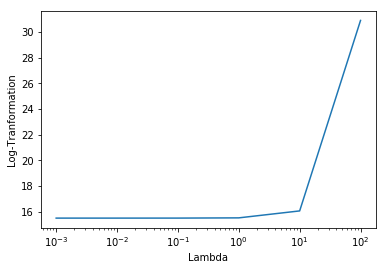

In [81]:
t = k_fold_cv_ridge(X_train, Y_train, [10**-3,10**-2,10**-1,1,10,100], K=10)


### d)

When we ask to plot the errors please use this convenction red = cv, blue = test. You can see in e) how to do it

In [8]:
X, Y = get_data_x_cube(300)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

### e)

In [9]:
X, Y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=420)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

In [10]:
ks = np.arange(1,11)
parameters = {'n_neighbors': ks}
clf = GridSearchCV(KNeighborsClassifier(weights="uniform"), parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_train_score']

In [11]:
accuracy = np.zeros(len(ks))
    
for i, k in enumerate(ks):
        
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(X_train, Y_train)
    accuracy[i] = knn.score(X_test, Y_test)

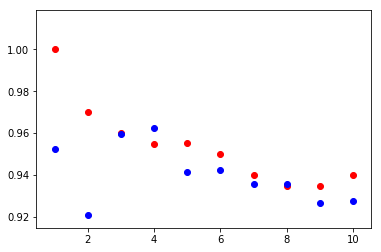

In [12]:
plt.figure()
plt.scatter(ks, accuracy_cv, c="red")
plt.scatter(ks, accuracy, c="blue")

In [13]:
accuracy_cv, accuracy

(array([1.        , 0.9701426 , 0.96004159, 0.95499109, 0.95513963,
        0.95008913, 0.93998812, 0.93493761, 0.93493761, 0.93998812]),
 array([0.95260664, 0.92101106, 0.95945234, 0.9626119 , 0.94154818,
        0.94260137, 0.93575566, 0.93575566, 0.92680358, 0.92785677]))

# Exercise 2

In [14]:
X, Y = get_data(400)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

### a)

### b)

### c)